# Part 1: Getting started

## Load Cifar10 dataset from tf.keras

2021-11-28 03:40:35.571886: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/xilinx/xrt/lib:/usr/lib:/usr/lib/x86_64-linux-gnu:/usr/local/lib:/opt/vitis_ai/conda/envs/vitis-ai-tensorflow/lib
2021-11-28 03:40:35.571916: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


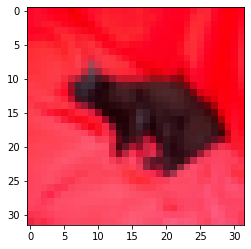

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
plt.imshow(x_train[21])
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
#One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

### Let's print some information about the dataset
Print the the dataset shape

In [2]:
print(x_train.shape, x_test.shape,y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 10) (10000, 10)


## Construct the model

In [9]:
from tensorflow.keras.layers import Dropout,Flatten, Dense, Activation, BatchNormalization, Conv2D, MaxPooling2D,InputLayer
from tensorflow.keras.models import Sequential

model = Sequential()
input_shape = (32, 32, 3)
model.add(InputLayer(input_shape=input_shape))
model.add(Conv2D(16, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation(activation='softmax'))

"""
model = Sequential()
input_shape=(32, 32, 3)
model.add(InputLayer(input_shape=input_shape))
model.add(Conv2D(16, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation="relu"))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation(activation='softmax'))
"""
model.summary()
model.build()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

## Train the model
We'll use Adam optimizer with categorical crossentropy loss.
The callbacks will decay the learning rate and save the model into a directory 'model_mnist_cnn'
The model isn't very complex, so this should just take a few minutes even on the CPU.
If you've restarted the notebook kernel after training once, set `train = False` to load the trained model.

In [11]:
from tensorflow.keras.optimizers import Adam
from callbacks import all_callbacks
import os
train = True


if train:
    adam = Adam(lr=0.0001)
    model.compile(optimizer=adam, loss=['categorical_crossentropy'], metrics=['accuracy'])
    callbacks = all_callbacks(stop_patience = 1000,
                              lr_factor = 0.5,
                              lr_patience = 10,
                              lr_epsilon = 0.000001,
                              lr_cooldown = 2,
                              lr_minimum = 0.0000001,
                              outputDir = 'model_cifar10_cnn')
    model.fit(x_train, y_train, batch_size=128,
              epochs=100, validation_data=(x_test, y_test), shuffle=True,
              callbacks = callbacks.callbacks)
else:
    from tensorflow.keras.models import load_model
    model = load_model('model_cifar10_cnn/KERAS_check_best_model.h5')

2021-11-28 10:39:16.917551: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.


Epoch 1/100
  1/391 [..............................] - ETA: 0s - loss: 1.0764 - accuracy: 0.6328WARNING:tensorflow:From /home/vitis-ai-user/.conda/envs/hls4ml/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
  5/391 [..............................] - ETA: 11s - loss: 1.1056 - accuracy: 0.6187

2021-11-28 10:39:19.530620: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2021-11-28 10:39:19.569362: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: model_cifar10_cnn/logs/train/plugins/profile/2021_11_28_10_39_19
2021-11-28 10:39:19.576466: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to model_cifar10_cnn/logs/train/plugins/profile/2021_11_28_10_39_19/ECE-util1.trace.json.gz
2021-11-28 10:39:19.590947: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: model_cifar10_cnn/logs/train/plugins/profile/2021_11_28_10_39_19
2021-11-28 10:39:19.594035: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for memory_profile.json.gz to model_cifar10_cnn/logs/train/plugins/profile/2021_11_28_10_39_19/ECE-util1.memory_profile.json.gz
2021-11-28 10:39:19.618468: I tensorflow/python/profiler/internal/profiler_wrapper.c

389/391 [============================>.] - ETA: 0s - loss: 1.1315 - accuracy: 0.6022
***callbacks***
saving losses to model_cifar10_cnn/losses.log

Epoch 00001: val_loss improved from inf to 1.16630, saving model to model_cifar10_cnn/KERAS_check_best_model.h5

Epoch 00001: val_loss improved from inf to 1.16630, saving model to model_cifar10_cnn/KERAS_check_best_model_weights.h5

Epoch 00001: saving model to model_cifar10_cnn/KERAS_check_model_last.h5

Epoch 00001: saving model to model_cifar10_cnn/KERAS_check_model_last_weights.h5

***callbacks end***

391/391 [==============================] - 6s 14ms/step - loss: 1.1316 - accuracy: 0.6021 - val_loss: 1.1663 - val_accuracy: 0.5887
Epoch 2/100
391/391 [==============================] - ETA: 0s - loss: 1.1281 - accuracy: 0.6035
***callbacks***
saving losses to model_cifar10_cnn/losses.log

Epoch 00002: val_loss improved from 1.16630 to 1.14104, saving model to model_cifar10_cnn/KERAS_check_best_model.h5

Epoch 00002: val_loss improved f

Epoch 14/100
391/391 [==============================] - ETA: 0s - loss: 1.0813 - accuracy: 0.6192
***callbacks***
saving losses to model_cifar10_cnn/losses.log

Epoch 00014: val_loss did not improve from 1.10678

Epoch 00014: val_loss did not improve from 1.10678

Epoch 00014: saving model to model_cifar10_cnn/KERAS_check_model_last.h5

Epoch 00014: saving model to model_cifar10_cnn/KERAS_check_model_last_weights.h5

***callbacks end***

391/391 [==============================] - 5s 12ms/step - loss: 1.0813 - accuracy: 0.6192 - val_loss: 1.1256 - val_accuracy: 0.6032
Epoch 15/100
388/391 [============================>.] - ETA: 0s - loss: 1.0767 - accuracy: 0.6210
***callbacks***
saving losses to model_cifar10_cnn/losses.log

Epoch 00015: val_loss improved from 1.10678 to 1.10166, saving model to model_cifar10_cnn/KERAS_check_best_model.h5

Epoch 00015: val_loss improved from 1.10678 to 1.10166, saving model to model_cifar10_cnn/KERAS_check_best_model_weights.h5

Epoch 00015: saving mod

Epoch 27/100
390/391 [============================>.] - ETA: 0s - loss: 1.0388 - accuracy: 0.6352
***callbacks***
saving losses to model_cifar10_cnn/losses.log

Epoch 00027: val_loss improved from 1.07496 to 1.07302, saving model to model_cifar10_cnn/KERAS_check_best_model.h5

Epoch 00027: val_loss improved from 1.07496 to 1.07302, saving model to model_cifar10_cnn/KERAS_check_best_model_weights.h5

Epoch 00027: saving model to model_cifar10_cnn/KERAS_check_model_last.h5

Epoch 00027: saving model to model_cifar10_cnn/KERAS_check_model_last_weights.h5

***callbacks end***

391/391 [==============================] - 5s 12ms/step - loss: 1.0388 - accuracy: 0.6352 - val_loss: 1.0730 - val_accuracy: 0.6225
Epoch 28/100
386/391 [============================>.] - ETA: 0s - loss: 1.0372 - accuracy: 0.6360
***callbacks***
saving losses to model_cifar10_cnn/losses.log

Epoch 00028: val_loss improved from 1.07302 to 1.06853, saving model to model_cifar10_cnn/KERAS_check_best_model.h5

Epoch 0002

Epoch 40/100
390/391 [============================>.] - ETA: 0s - loss: 1.0036 - accuracy: 0.6473
***callbacks***
saving losses to model_cifar10_cnn/losses.log

Epoch 00040: val_loss improved from 1.05005 to 1.04279, saving model to model_cifar10_cnn/KERAS_check_best_model.h5

Epoch 00040: val_loss improved from 1.05005 to 1.04279, saving model to model_cifar10_cnn/KERAS_check_best_model_weights.h5

Epoch 00040: saving model to model_cifar10_cnn/KERAS_check_model_last.h5

Epoch 00040: saving model to model_cifar10_cnn/KERAS_check_model_last_weights.h5

Epoch 00040: saving model to model_cifar10_cnn/KERAS_check_model_epoch40.h5

***callbacks end***

391/391 [==============================] - 5s 13ms/step - loss: 1.0038 - accuracy: 0.6473 - val_loss: 1.0428 - val_accuracy: 0.6316
Epoch 41/100
391/391 [==============================] - ETA: 0s - loss: 1.0070 - accuracy: 0.6470
***callbacks***
saving losses to model_cifar10_cnn/losses.log

Epoch 00041: val_loss did not improve from 1.04279

389/391 [============================>.] - ETA: 0s - loss: 0.9742 - accuracy: 0.6585
***callbacks***
saving losses to model_cifar10_cnn/losses.log

Epoch 00053: val_loss improved from 1.02759 to 1.02167, saving model to model_cifar10_cnn/KERAS_check_best_model.h5

Epoch 00053: val_loss improved from 1.02759 to 1.02167, saving model to model_cifar10_cnn/KERAS_check_best_model_weights.h5

Epoch 00053: saving model to model_cifar10_cnn/KERAS_check_model_last.h5

Epoch 00053: saving model to model_cifar10_cnn/KERAS_check_model_last_weights.h5

***callbacks end***

391/391 [==============================] - 5s 13ms/step - loss: 0.9740 - accuracy: 0.6584 - val_loss: 1.0217 - val_accuracy: 0.6436
Epoch 54/100
389/391 [============================>.] - ETA: 0s - loss: 0.9731 - accuracy: 0.6595
***callbacks***
saving losses to model_cifar10_cnn/losses.log

Epoch 00054: val_loss did not improve from 1.02167

Epoch 00054: val_loss did not improve from 1.02167

Epoch 00054: saving model to model_c

Epoch 66/100
391/391 [==============================] - ETA: 0s - loss: 0.9481 - accuracy: 0.6674
***callbacks***
saving losses to model_cifar10_cnn/losses.log

Epoch 00066: val_loss did not improve from 1.00949

Epoch 00066: val_loss did not improve from 1.00949

Epoch 00066: saving model to model_cifar10_cnn/KERAS_check_model_last.h5

Epoch 00066: saving model to model_cifar10_cnn/KERAS_check_model_last_weights.h5

***callbacks end***

391/391 [==============================] - 5s 12ms/step - loss: 0.9481 - accuracy: 0.6674 - val_loss: 1.0127 - val_accuracy: 0.6476
Epoch 67/100
389/391 [============================>.] - ETA: 0s - loss: 0.9490 - accuracy: 0.6663
***callbacks***
saving losses to model_cifar10_cnn/losses.log

Epoch 00067: val_loss improved from 1.00949 to 1.00330, saving model to model_cifar10_cnn/KERAS_check_best_model.h5

Epoch 00067: val_loss improved from 1.00949 to 1.00330, saving model to model_cifar10_cnn/KERAS_check_best_model_weights.h5

Epoch 00067: saving mod

Epoch 79/100
389/391 [============================>.] - ETA: 0s - loss: 0.9248 - accuracy: 0.6764
***callbacks***
saving losses to model_cifar10_cnn/losses.log

Epoch 00079: val_loss did not improve from 0.99338

Epoch 00079: val_loss did not improve from 0.99338

Epoch 00079: saving model to model_cifar10_cnn/KERAS_check_model_last.h5

Epoch 00079: saving model to model_cifar10_cnn/KERAS_check_model_last_weights.h5

***callbacks end***

391/391 [==============================] - 5s 12ms/step - loss: 0.9247 - accuracy: 0.6763 - val_loss: 0.9997 - val_accuracy: 0.6515
Epoch 80/100
388/391 [============================>.] - ETA: 0s - loss: 0.9219 - accuracy: 0.6770
***callbacks***
saving losses to model_cifar10_cnn/losses.log

Epoch 00080: val_loss did not improve from 0.99338

Epoch 00080: val_loss did not improve from 0.99338

Epoch 00080: saving model to model_cifar10_cnn/KERAS_check_model_last.h5

Epoch 00080: saving model to model_cifar10_cnn/KERAS_check_model_last_weights.h5

Epoch

Epoch 92/100
389/391 [============================>.] - ETA: 0s - loss: 0.9017 - accuracy: 0.6856
***callbacks***
saving losses to model_cifar10_cnn/losses.log

Epoch 00092: val_loss did not improve from 0.97806

Epoch 00092: val_loss did not improve from 0.97806

Epoch 00092: saving model to model_cifar10_cnn/KERAS_check_model_last.h5

Epoch 00092: saving model to model_cifar10_cnn/KERAS_check_model_last_weights.h5

***callbacks end***

391/391 [==============================] - 5s 12ms/step - loss: 0.9022 - accuracy: 0.6853 - val_loss: 0.9821 - val_accuracy: 0.6631
Epoch 93/100
388/391 [============================>.] - ETA: 0s - loss: 0.9007 - accuracy: 0.6863
***callbacks***
saving losses to model_cifar10_cnn/losses.log

Epoch 00093: val_loss did not improve from 0.97806

Epoch 00093: val_loss did not improve from 0.97806

Epoch 00093: saving model to model_cifar10_cnn/KERAS_check_model_last.h5

Epoch 00093: saving model to model_cifar10_cnn/KERAS_check_model_last_weights.h5

***ca

## Check performance
Check the accuracy and make a ROC curve

Accuracy: 0.5954


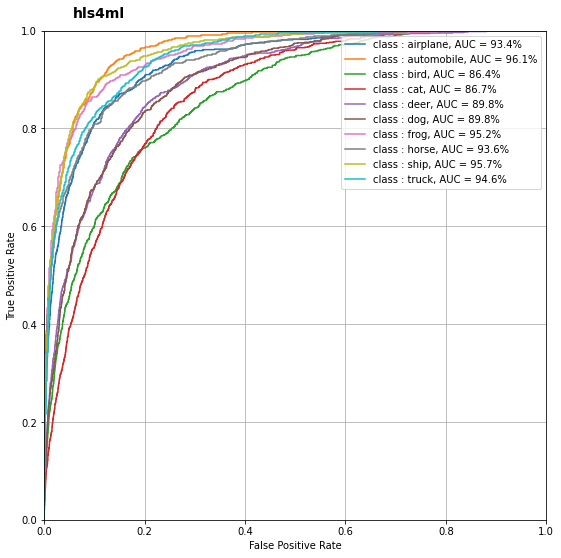

In [5]:
import plotting
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
cifar10_classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
y_keras = model.predict(x_test)
print("Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_keras, axis=1))))
plt.figure(figsize=(9,9))
_ = plotting.makeRoc(y_test, y_keras, cifar10_classes)

# Convert the model to FPGA firmware with hls4ml
Now we will go through the steps to convert the model we trained to a low-latency optimized FPGA firmware with hls4ml.
First, we will evaluate its classification performance to make sure we haven't lost accuracy using the fixed-point data types. 
Then we will synthesize the model with Vivado HLS and check the metrics of latency and FPGA resource usage.

## Make an hls4ml config & model
The hls4ml Neural Network inference library is controlled through a configuration dictionary.
In this example we'll use the most simple variation, later exercises will look at more advanced configuration.

In [6]:
import hls4ml
from hls4ml.converters.keras_to_hls import keras_to_hls


config = hls4ml.utils.config_from_keras_model(model, granularity='name')
config['Backend']='VivadoAccelerator'
config['OutputDir'] = 'cifar10-hls-test'
config['ProjectName'] = 'myproject_cifar10_cnn'
config['XilinxPart']= 'xczu7ev-ffvc1156-2-e'
config['Board'] = 'zcu104'
config['ClockPeriod'] = 5
config['IOType'] = 'io_stream'
config['HLSConfig']={}
config['HLSConfig']['Model']={}
config['HLSConfig']['Model']=config['Model']
config['HLSConfig']['LayerName']=config['LayerName']
del config['Model']
del config['LayerName']
config['AcceleratorConfig']={}
config['AcceleratorConfig']['Interface'] = 'axi_stream'
config['AcceleratorConfig']['Driver'] = 'python'
config['AcceleratorConfig']['Precision']={}
config['AcceleratorConfig']['Precision']['Input']= 'float'
config['AcceleratorConfig']['Precision']['Output']= 'float'
config['KerasModel'] = model

print("-----------------------------------")
print("Configuration")
plotting.print_dict(config)
print("-----------------------------------")

hls_model = keras_to_hls(config)


/workspace/home/ymli/cifar_10_hls4ml/hls4ml/converters/__init__.py:16: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!")
/workspace/home/ymli/cifar_10_hls4ml/hls4ml/converters/__init__.py:23: UserWarning: WARNING: ONNX converter is not enabled!
  warnings.warn("WARNING: ONNX converter is not enabled!")


Interpreting Sequential
Topology:
Layer name: input_24, layer type: Input
Layer name: conv2d_97, layer type: Conv2D
  -> Activation (relu), layer name: conv2d_97
Layer name: max_pooling2d_52, layer type: MaxPooling2D
Layer name: conv2d_98, layer type: Conv2D
  -> Activation (relu), layer name: conv2d_98
Layer name: max_pooling2d_53, layer type: MaxPooling2D
Layer name: conv2d_99, layer type: Conv2D
  -> Activation (relu), layer name: conv2d_99
Layer name: conv2d_100, layer type: Conv2D
  -> Activation (relu), layer name: conv2d_100
Layer name: dense_38, layer type: Dense
  -> Activation (linear), layer name: dense_38
Layer name: dense_39, layer type: Dense
  -> Activation (linear), layer name: dense_39
Layer name: activation_17, layer type: Activation
-----------------------------------
Configuration
Backend:             VivadoAccelerator
OutputDir:           cifar10-hls-test
ProjectName:         myproject_cifar10_cnn
XilinxPart:          xczu7ev-ffvc1156-2-e
Board:               zcu10

Let's visualise what we created. The model architecture is shown, annotated with the shape and data types

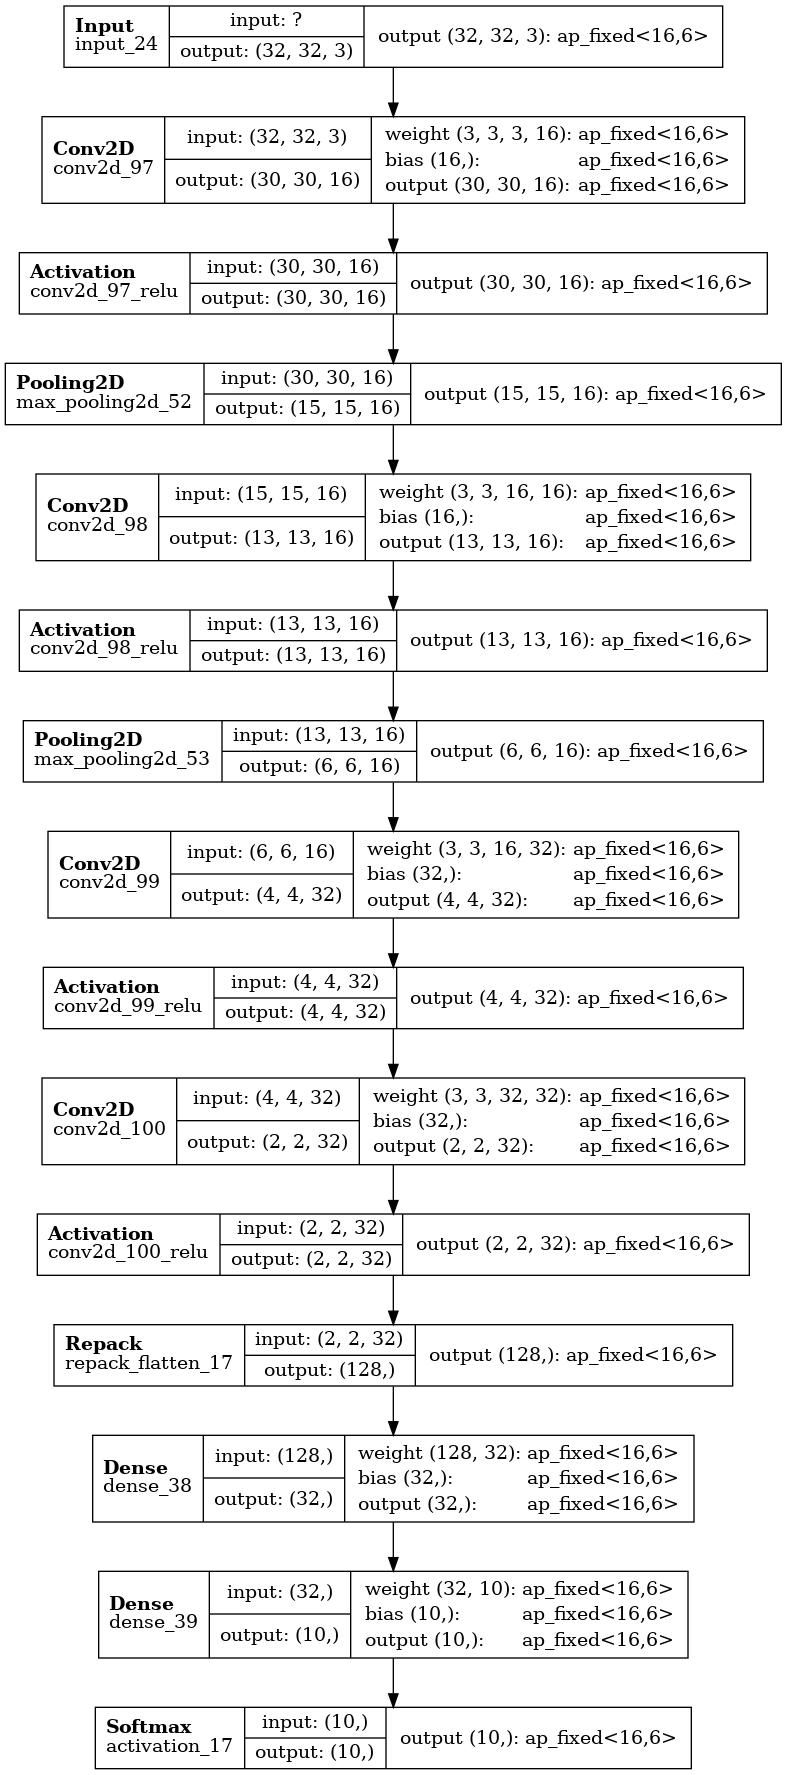

In [7]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

## Compile, predict
Now we need to check that this model performance is still good. We compile the hls_model, and then use `hls_model.predict` to execute the FPGA firmware with bit-accurate emulation on the CPU.

In [8]:
hls_model.compile()
x_test = np.ascontiguousarray(x_test)
y_hls4ml = hls_model.predict(x_test)

Writing HLS project


KeyboardInterrupt: 

## Compare
That was easy! Now let's see how the performance compares to Keras:

In [ ]:
acc_hls4ml = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_hls4ml, axis=1))
acc_keras=accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_keras, axis=1))
print('Accuracy hls4ml:     {}'.format(acc_hls4ml))
print('Accuracy keras:      {}'.format(acc_keras))

fig, ax = plt.subplots(figsize=(9, 9))
_ = plotting.makeRoc(y_test, y_keras, cifar10_classes)
plt.gca().set_prop_cycle(None) # reset the colors
_ = plotting.makeRoc(y_test, y_hls4ml, cifar10_classes, linestyle='--')

from matplotlib.lines import Line2D
lines = [Line2D([0], [0], ls='-'),
         Line2D([0], [0], ls='--')]
from matplotlib.legend import Legend
leg = Legend(ax, lines, labels=['keras', 'hls4ml'],
            loc='lower right', frameon=False)
ax.add_artist(leg)

## Synthesize
Now we'll actually use Vivado HLS to synthesize the model. We can run the build using a method of our `hls_model` object.
After running this step, we can integrate the generated IP into a workflow to compile for a specific FPGA board.
In this case, we'll just review the reports that Vivado HLS generates, checking the latency and resource usage.

**This can take several minutes.**

While the C-Synthesis is running, we can monitor the progress looking at the log file by opening a terminal from the notebook home, and executing:

`tail -f mnist-hls-test/vivado_hls.log`

In [ ]:
import os
os.environ['PATH'] = '/workspace/home/Xilinx/Vivado/2019.2/bin:' + os.environ['PATH']
hls_model.build(csim=False,synth=True,export=False)

## Check the reports
Print out the reports generated by Vivado HLS. Pay attention to the Latency and the 'Utilization Estimates' sections

In [ ]:
import hls4ml
from hls4ml.converters.keras_to_hls import keras_to_hls

hls4ml.report.read_vivado_report('cifar10-hls-test')